In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('spotify.csv')

In [27]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [36]:
df.drop('Track ID', axis = 1, inplace = True)

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [37]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0


In [29]:
df.duplicated().sum()

27

In [30]:
#There is no null value present in the data set, but there are 27 rows which are duplicated so we can drop these rows

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

In [33]:
df.shape

(413, 5)

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

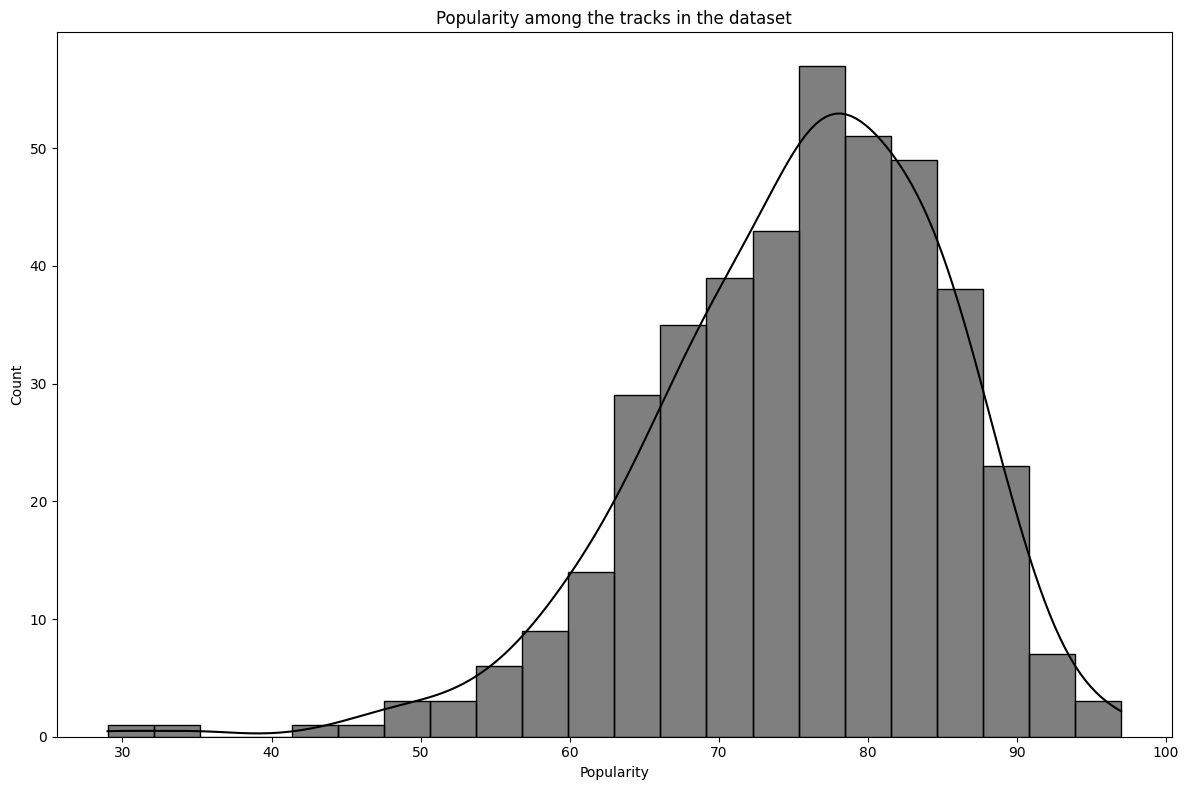

In [69]:
plt.figure(figsize = (12,8))
sns.histplot(df['Popularity'],kde = True, color= 'black')
plt.title('Popularity among the tracks in the dataset')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

3. Is there any relationship b/w the popularity and the duration of tracks? Explore using a scatter plot.

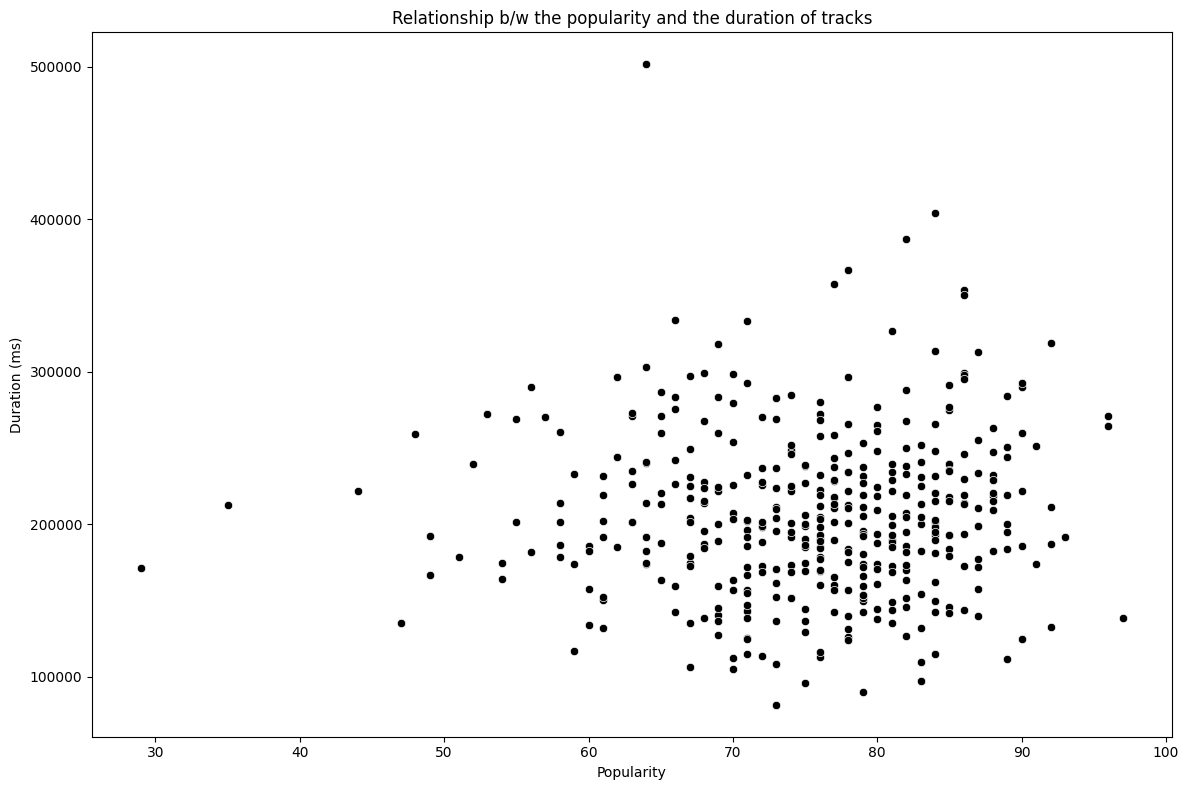

In [71]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Popularity', y = 'Duration (ms)', data = df ,color = 'black')
plt.title('Relationship b/w the popularity and the duration of tracks')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()

In [ ]:
#insights:- Most Popular and duration of the tracks are b/w 70 to 90

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

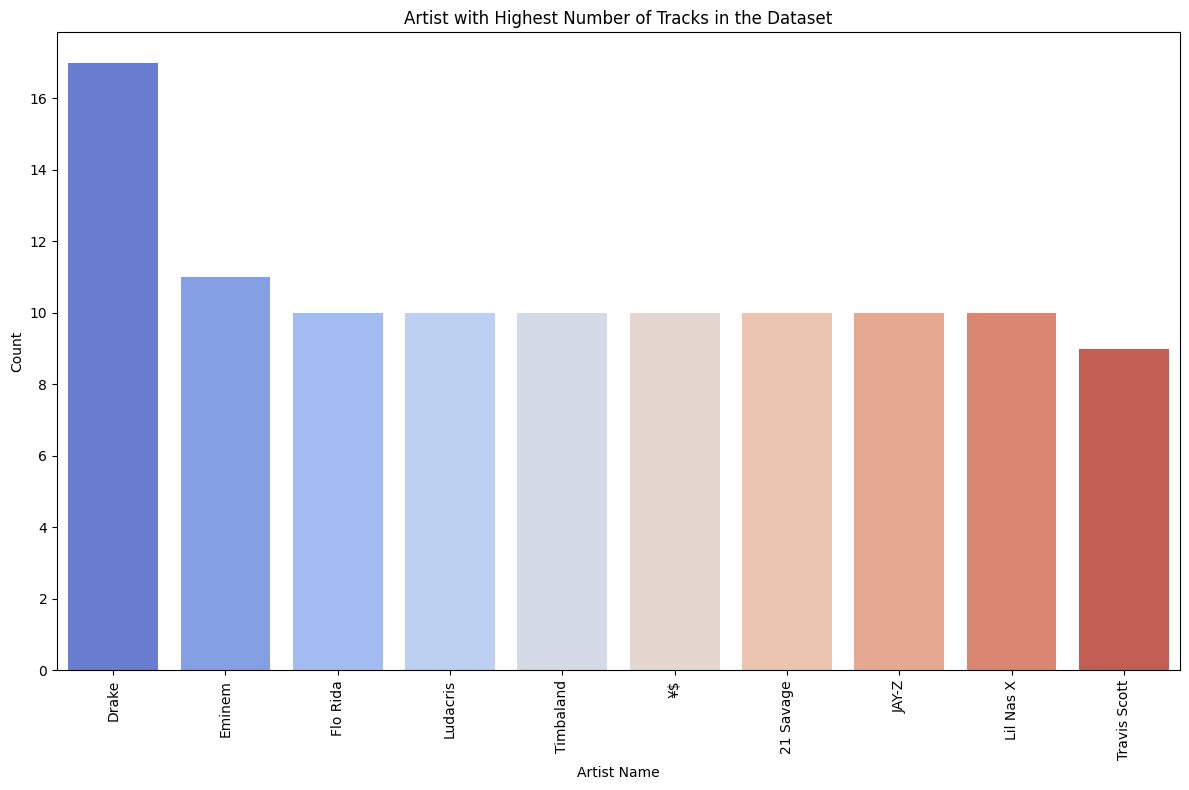

In [74]:
top_10_artists = df['Artist'].value_counts().head(10)
filtered_data = df[df['Artist'].isin(top_10_artists.index)]

# Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Artist', data=filtered_data, order=top_10_artists.index,palette = 'coolwarm')
plt.title('Artist with Highest Number of Tracks in the Dataset')
plt.xlabel('Artist Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [75]:
Top_5_least_popular_tracks = df.sort_values(by = 'Popularity', ascending = True).head(5)
Top_5_least_popular_tracks

,Artist,Track Name,Popularity,Duration (ms)
207,Pressa,Attachments (feat. Coi Leray),29,171000
231,Justin Bieber,Intentions,35,212853
413,French Montana,Splash Brothers,44,221863
225,Lil Baby,On Me - Remix,47,135444
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?

In [79]:
df.groupby('Artist')['Popularity'].mean().sort_values(ascending = False).head(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


7. For the top 5 most popular artist, what are their most popular tracks? List the track name for each artist.

In [83]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)'], dtype='object')

In [85]:
top_5_artists = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5).index

top_tracks = {}

for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist].sort_values(by=['Popularity'], ascending=False)

    if not artist_tracks.empty:
        top_track = artist_tracks.iloc[0]['Track Name']

        top_tracks[artist] = top_track

for artist, track in top_tracks.items():
    print(f"Most popular track for {artist}: {track}")

Most popular track for Drake: Rich Baby Daddy (feat. Sexyy Red & SZA)
Most popular track for Eminem: Without Me
Most popular track for ¥$: CARNIVAL
Most popular track for 21 Savage: redrum
Most popular track for Flo Rida: Low (feat. T-Pain)


8. Visualize relationship b/w multiple numerical variable simultaneously using a pair plot.

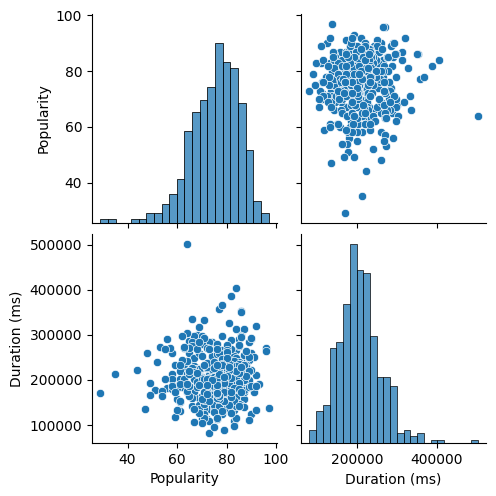

In [101]:
sns.pairplot(df.select_dtypes(include = 'number'))

9. Does the duration of tracks vary significantly across different artist? Explore this visually using a box_plot or Violin plot?

In [100]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)'], dtype='object')

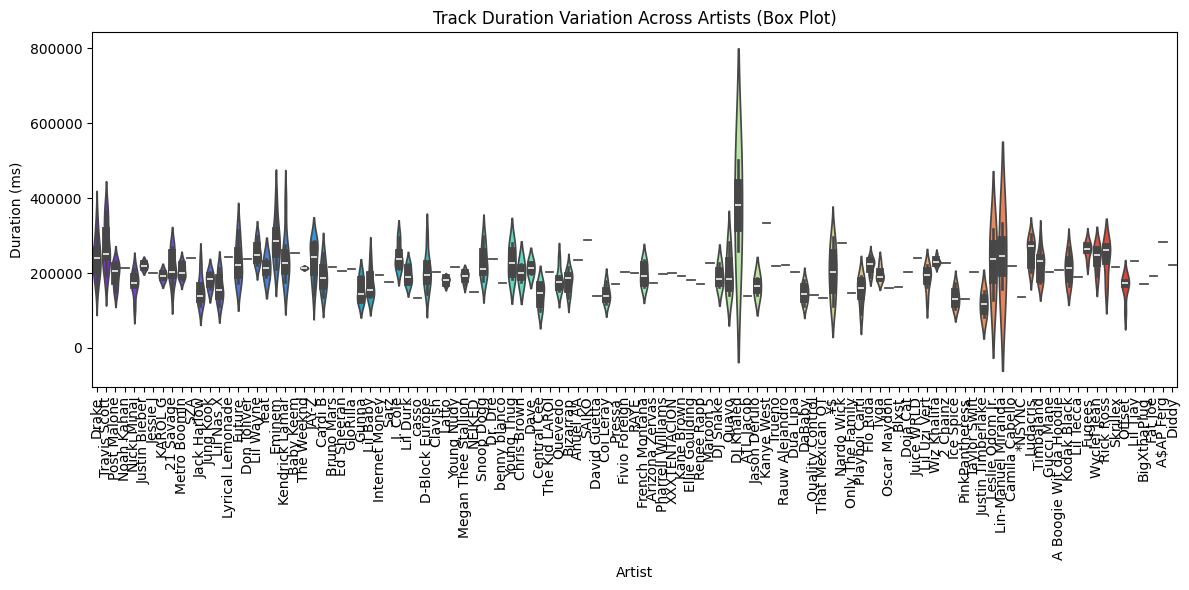

In [104]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=df, palette = 'rainbow')
plt.xticks(rotation=90)
plt.title('Track Duration Variation Across Artists (Box Plot)')
plt.tight_layout()
plt.show()

10. How does the distribution of track popularity vary for different artists? visualize this using a swarm plot or a violin plot.

<Axes: xlabel='Artist', ylabel='Popularity'>

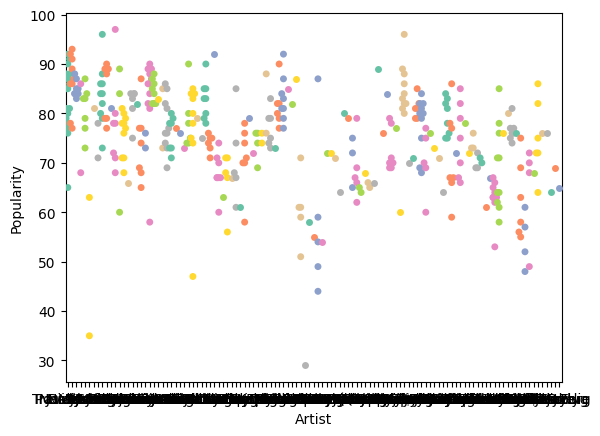

In [109]:
sns.swarmplot(x = 'Artist', y = 'Popularity', data = df, palette = 'Set2')